In [16]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from utilities import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
df['created_at'].dt

In [39]:
data_path = '../data/data.csv'

df = pd.read_csv(data_path)
df['created_at'] = pd.to_datetime(df['created_at'])
intervals = ['year', 'month', 'week', 'day', 'weekday', 'hour']
for interval in intervals:
    # df[interval] = df['created_at'].apply(lambda row: getattr(row, interval))
    df[interval] = getattr(df['created_at'].dt, interval)
utils.df_summarise(df)

/mnt/d/coding/git/TomaszKaleczyc/customer_order_prediction/environment/cust_venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


(26513, 13)

Index(['order_id', 'customer_id', 'created_at', 'total_price', 'shipping_zip',
       'billing_zip', 'segment', 'year', 'month', 'week', 'day', 'weekday',
       'hour'],
      dtype='object')

,order_id,customer_id,created_at,total_price,shipping_zip,billing_zip,segment,year,month,week,day,weekday,hour
0,1158820823102,1399261528126,2019-08-13 03:08:30,3192.00,8700,8700,4,2019,8,33,13,1,3
1,1856685080638,2733349404734,2019-11-07 06:17:09,135.15,9000,9000,3,2019,11,45,7,3,6
2,1994825334846,2862876164158,2019-12-25 14:47:26,288.00,8722,8722,3,2019,12,52,25,2,14
3,2116997972030,2888199700542,2020-02-20 09:15:17,237.00,3650,3650,6,2020,2,8,20,3,9
4,2155705139262,2992745709630,2020-03-13 22:57:46,208.00,9900,9900,3,2020,3,11,13,4,22


YEAR


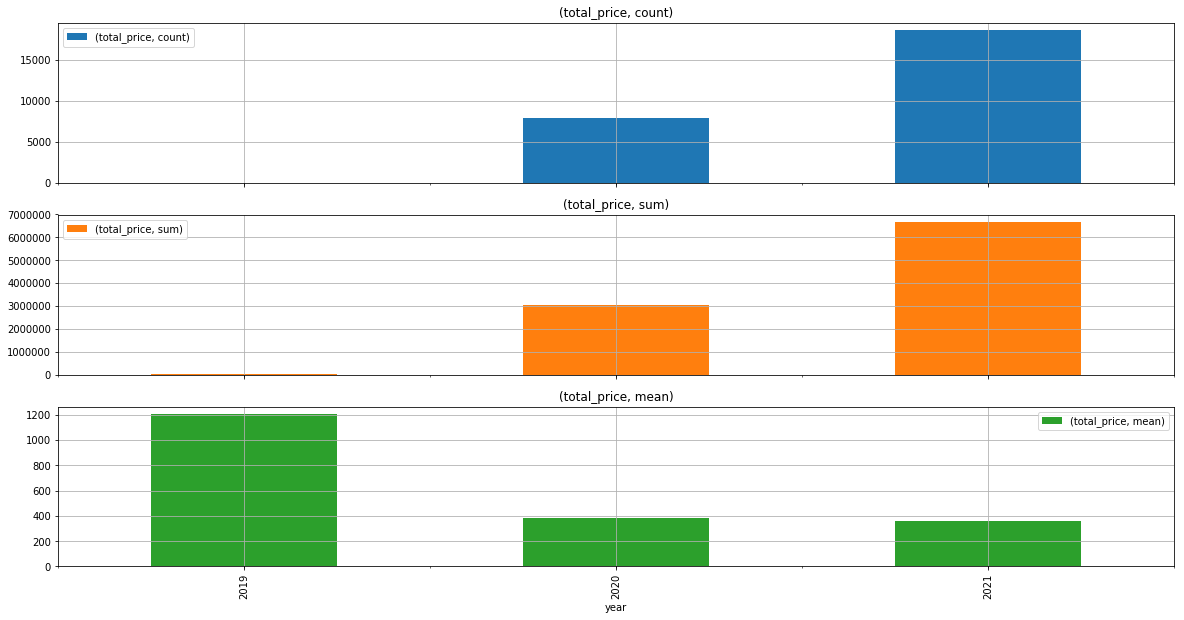

MONTH


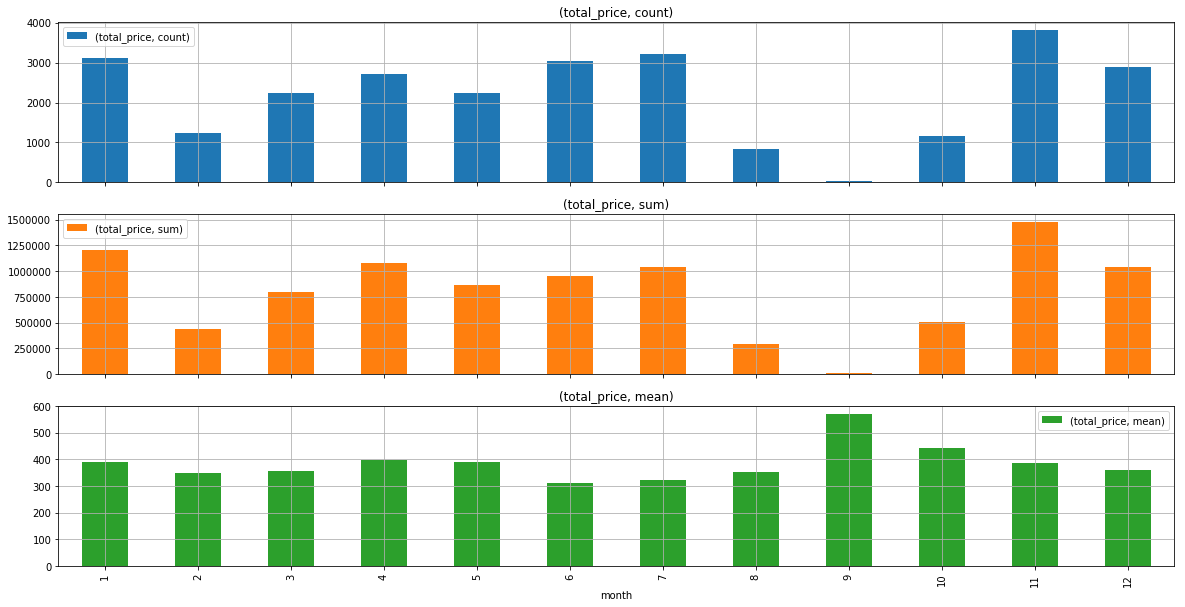

WEEK


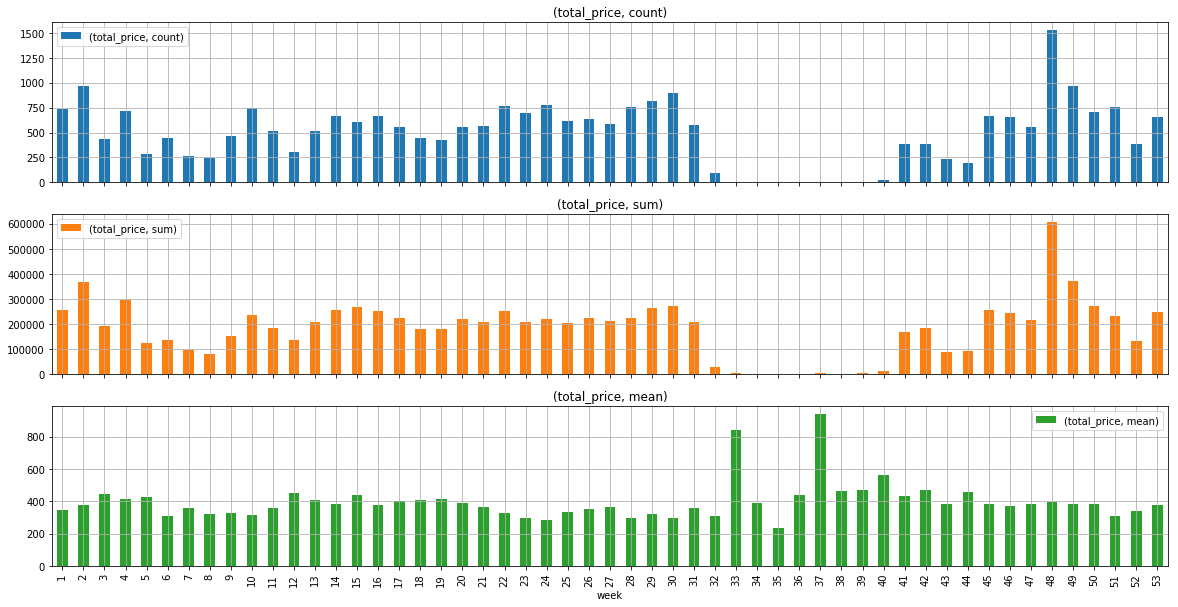

DAY


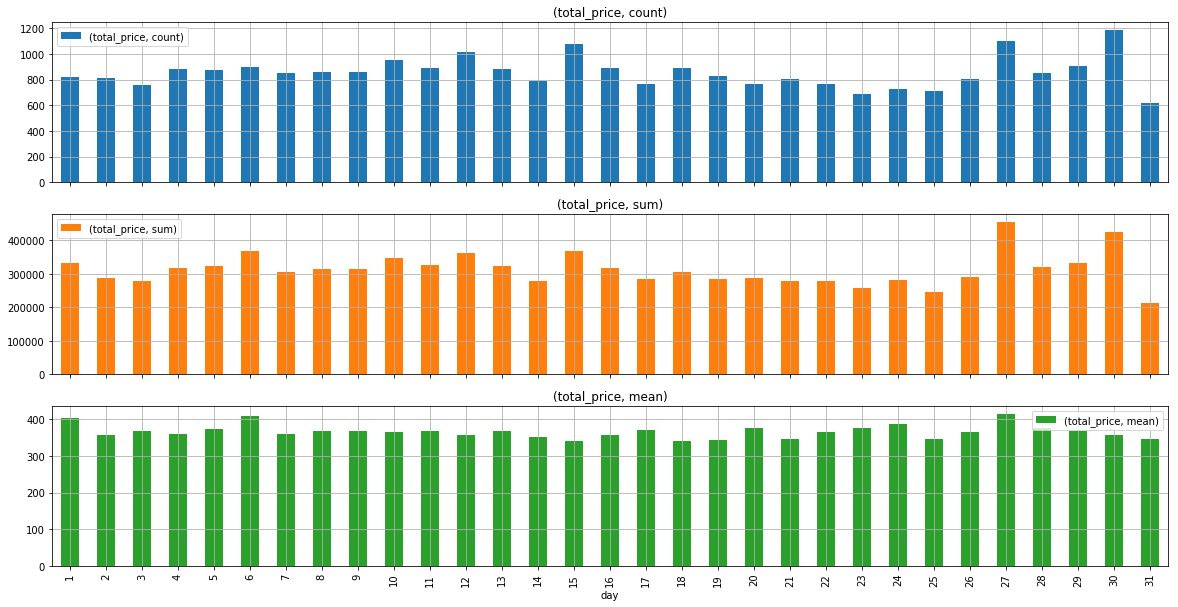

WEEKDAY


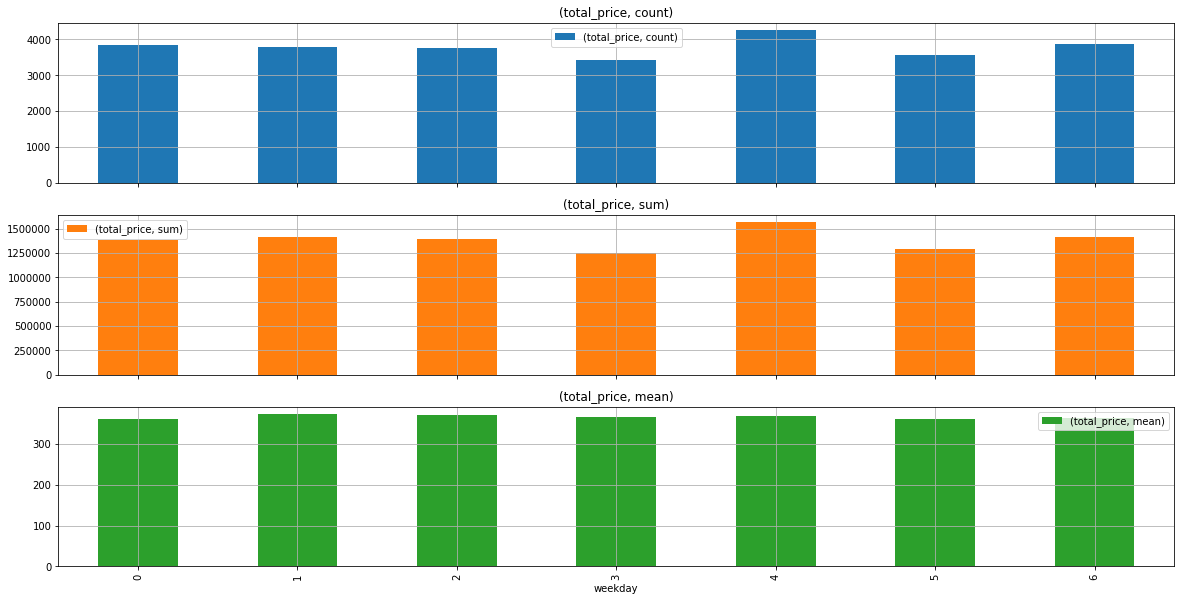

HOUR


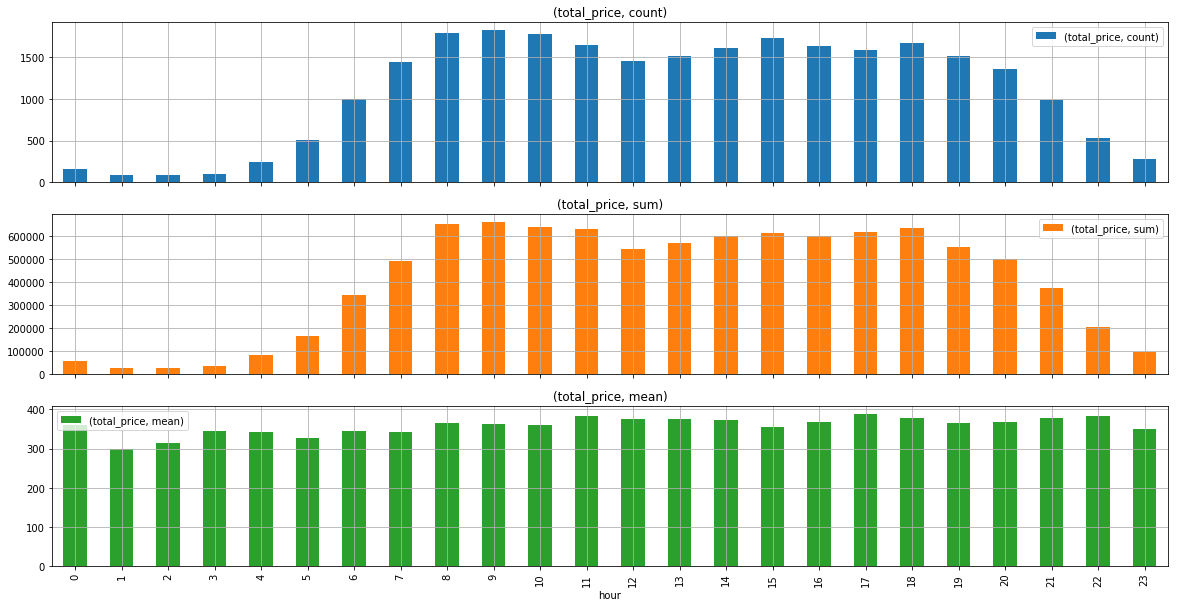

In [41]:
figsize = (20, 10)

for interval in intervals:
    print('='*60)
    print(interval.upper())
    agg_df = (df[[interval, 'total_price']]
                .groupby(interval)
                .agg(['count', 'sum', 'mean']
                )
                

    )
    agg_df.plot(kind='bar', grid=True, subplots=True, sharex=True, figsize=figsize)
    plt.show()
    # agg_df.plot(kind='bar', secondary_y=('total_price','sum'), rot=0, figsize=figsize)